[View in Colaboratory](https://colab.research.google.com/github/keisuke6616/14-DBDA/blob/master/Seciton2_2.ipynb)

In [0]:
import numpy as np
import numpy.linalg as la

from sklearn.svm import SVC

import matplotlib.pyplot as plt


import time

# Section 2.2

We use computer simulations to compare the performance of the classifiers. We generate ${\bf x}_{ij} - {\boldsymbol \mu}_i, \ j = 1, 2, \ldots, (i = 1, 2)$ independently from a pseudorandom p-variate t-distribution, $t_p({\bf 0}, {\boldsymbol \Sigma}_i, \nu)$ with mean zero, covariance matrix ${\boldsymbol \Sigma}_i$ and degrees of freedom $\nu$. 

We set ${\boldsymbol \mu}_2 = {\bf 0}, \ {\boldsymbol \Sigma}_1 = c_1{\bf B}(0.3^{|i - j|^{1/3}}){\bf B}$ and ${\boldsymbol \Sigma}_2 = c_2{\bf B}(0.3^{|i - j|^{1/3}}){\bf B}$, where ${\bf B} = \mathrm{diag} \left[\{0.5 + 1 \ / \  (p + 1)\}^{1/2}, \ldots, \{0.5 + p \ /  \ (p + 1)\}^{1/2} \right]$. We consider two cases for ${\boldsymbol \mu}_1$ : (a) $ {\boldsymbol \mu}_1 = (1, \ldots, 1, 0, \ldots, 0)^T$ whose first $\lceil p^{2/3} \rceil$ elements are 1, and (b) : $\mu_1 = (0, \ldots, 0, 1, \ldots, 1)^T$ whose last $\lceil p^{2/3} \rceil$ elements are 1.

We consider three cases :

$(Ⅰ) \ p=2^s,\ s=5,\ldots,10, \ (n_1,n_2)=(10, 20), \ (c_1, c_2) = (1, 1) $ and $\nu=25$  for (a) and (b);
$(Ⅱ) \ p = 2^s, \ s = 5,\ldots, 10,  \ (n_1, n_2) = (10, 20), \  (c_1, c_2) =(0.8, 1.2)$ and $\nu = 25$ for (b) \
$(Ⅲ) \ p=500, \ (n_1, n_2)=(10, 20), \ (c_1, c_2)=(0.8, 1.2) $ and $\nu = 10(10)60$ for (b)

\
Let ${\bf x}_0$ be an observation vector and we estimate ${\boldsymbol \mu}_i$ and ${\boldsymbol \Sigma}_i$ by $\overline{{\bf x}}_{in_i} = \sum_{j=1}^{n_i}{\bf x}_{ij} \ / \ n_i $ and ${\bf S}_{in_i} = \sum_{j = 1}^{n_i} ({\bf x}_{ij} - \overline{{\bf x}}_{in_i}) ({\bf x}_{ij} - \overline{{\bf x}}_{in_i})^T \ / \ (n_i - 1)$ for $i = 1, 2$



Now we compare the follow classifiers: \
one classifiers an individual into $\pi_1$ if \
DBDA : $\left({\bf x}_0 - \frac{\overline{{\bf x}}_{1n_1} + \overline{{\bf x}}_{2n_2}}{2} \right)^T \left( \overline{{\bf x}}_{2n_2} - \overline{{\bf x}}_{1n_1} \right) - \frac{\mathrm{tr}\left({\bf S}_{1n_1}\right)}{2n_1} + \frac{\mathrm{tr}\left({\bf S}_{2n_2}\right)}{2n_2} < 0$ 

GQDA : $\frac{p||{\bf x}_0 - \overline{{\bf x}}_{1n_1}||^2}{\mathrm{tr}\left({\bf S}_{1n_1}\right)} - \frac{p||{\bf x}_0 - \overline{{\bf x}}_{2n_2}||^2}{\mathrm{tr}\left({\bf S}_{2n_2}\right)} - p\log\left\{ \frac{\mathrm{tr}\left({\bf S}_{2n_2} \right)}{\mathrm{tr}\left({\bf S}_{2n_2} \right)} \right\} - \frac{p}{n_1} + \frac{p}{n_2} < 0$ 

DLDA : $\{{\bf x}_0 - (\overline{{\bf x}}_{1n_1} + \overline{{\bf x}}_{2n_2}) \ / \ 2\}^T {\bf S}_d^{-1} (\overline{{\bf x}}_{2n_2} - \overline{{\bf x}}_{1n_1}) < 0$, where ${\bf S}_d = \mathrm{diag}(s_{1n}, \ldots, s_{pn}), \ s_{in} = \sum_{i=1}^2 \sum_{l=1}^{n_i}(x_{ijl} - \overline{x}_{ijn_i})^2 \ / \ (n_1 + n_2 -2) $

DQDA : $({\bf x}_0 - \overline{{\bf x}}_{1n_1})^T {\bf S}_{d(1)}^{-1} ({\bf x}_0 - \overline{{\bf x}}_{1n_1}) - ({\bf x}_0 - \overline{{\bf x}}_{2n_2})^T {\bf S}_{d(2)}^{-1} ({\bf x}_0 - \overline{{\bf x}}_{2n_2}) - \log\left\{\frac{\mathrm{det} \left({\bf S}_{d(2)} \right)}{\mathrm{det} \left({\bf S}_{d(1)} \right)} \right\} < 0$, where ${\bf S}_{d(i)} = \mathrm{diag}(s_{(i)1n_i}, \ldots, s_{(i)pn_i})$ and $s_{(i)jn_i} = \sum_{l=1}^{n_i}(x_{ijl} - \overline{x}_{ijn_i})^2 \ / \ (n_i-1)$

HM-LSVM : The hard-margin linear support vector machine

## Figure1


(a)：${\boldsymbol \mu}_1 = (1, \ldots, 1, 0, \ldots, 0)^T$

(b)：${\boldsymbol \mu}_1 = (0, \ldots, 0, 1, \ldots, 1)^T$

$(Ⅰ)\ p=2^s,\ s=5,\ldots,10, \ (n_1,n_2)=(10, 20), \ (c_1, c_2) = (1, 1) $ and $\nu=25$  for (a) and (b)

In [2]:
np.random.seed(42)
t1 = time.time()
n = [10, 10]
c = [1, 1]
df = 25

N_class = 2
N_dim = 6
N_classifier = 5
iter = 2000

y = [-1] * n[0] + [1] * n[1]


svm = SVC(C=float('inf'), kernel='linear')

result_a = np.zeros((N_dim, N_classifier, N_class))
result_b = np.zeros((N_dim, N_classifier, N_class))

result = [result_a, result_b]

for s in range(N_dim):
    p = 2**(s+5)
    print('Dimension:{}'.format(p))
    print('Calculating...')

    mu_a, mu_b = [], []
    mu_a.append(np.r_[np.ones(int(np.ceil(p**(2/3)))), np.zeros(p - int(np.ceil(p**(2/3))))])
    mu_a.append(np.zeros(p))

    mu_b.append(np.r_[np.zeros(int(p - int(np.ceil(p**(2/3))))), np.ones(int(np.ceil(p**(2/3))))])
    mu_b.append(np.zeros(p))

    mu = [mu_a, mu_b]

    S = np.zeros((p, p))
    for i in range(p):
        for j in range(p):
            S[i, j] = (1/2 + (i+1) / (p+1))**(1/2) * 0.3**(np.abs(i - j)**(1/3)) * (1/2 + (j + 1) / (p + 1))**(1/2)

    Sigma,  P, Q = [], [], []
    for i in range(N_class):
        Sigma.append(c[i] * S)
        value, vec = la.eig(Sigma[i])
        P.append(np.sqrt(value)); Q.append(vec.T)

    for ab in range(2):
        for l in range(iter):
            x, trS, mean = [], [], []
            diag = []
            Y = []
            for i in range(N_class):
                Z = np.array([P[i] * (np.random.normal(0, 1, p)) for j in range(n[i])])
                X = np.dot(Z, Q[i]) / np.sqrt(np.random.chisquare(df, n[i]) / df).reshape(n[i], -1) + mu[ab][i]
                Y.append(X)
                cov = np.cov(X, rowvar=False)
                trS.append(np.trace(cov))
                mean.append(np.mean(X, axis=0))
                diag.append(np.diag(cov))

                # creat new date
                z = P[i] * (np.random.normal(0, 1, p))
                x.append(np.dot(z, Q[i])  / np.sqrt(np.random.chisquare(df, 1) / df) + mu[ab][i])



            #(3)DBDA
            for i in range(N_class):
                classifier = np.dot(x[i] - (mean[0] + mean[1]) / 2, mean[1] - mean[0]) - trS[0] / (2 * n[0]) + trS[1] / (2 * n[1])
                if (-1)**i * classifier < 0:
                    result[ab][s, 0, i] += 1


            #(6)GQDA
            for i in range(N_class):
                classifier = p * la.norm(x[i] - mean[0])**2 / trS[0] - p * la.norm(x[i] - mean[1])**2 / trS[1] - p * np.log(trS[1] / trS[0]) - p / n[0] + p / n[1]
                if (-1)**i * classifier < 0:
                    result[ab][s, 1, i] += 1

            #DLDA
            S_d_inv = np.diag((((n[0] - 1) * diag[0] + (n[1] - 1) * diag[1]) / (n[0] + n[1] - 2))**(-1))
            for i in range(N_class):
                classifier = np.einsum('i, ij, j', x[i] - (mean[0] + mean[1]) / 2, S_d_inv, mean[1] - mean[0])
                if (-1)**i * classifier < 0:
                    result[ab][s, 2, i] +=1

            #DQDA
            S_d0_inv = np.diag(diag[0]**(-1)); S_d1_inv = np.diag(diag[1]**(-1))
            for i in range(N_class):
                classifier = np.einsum('i, ij, j', x[i] - mean[0], S_d0_inv, x[i] - mean[0]) - np.einsum('i, ij, j', x[i] - mean[1], S_d1_inv, x[i] - mean[1]) \
                                    - np.sum(np.log(diag[1])) + np.sum(np.log(diag[0]))
                if (-1)**i * classifier < 0:
                    result[ab][s, 3, i] += 1

            #HM-LSVM
            Y = np.r_[Y[0], Y[1]]
            svm.fit(Y, y)
            for i in range(N_class):
                classifier = svm.predict([x[i]])
                if (-1)**i * classifier < 0:
                    result[ab][s, 4, i] += 1

    print('Result')
    print('DBDA: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 0, 0], result[0][s, 0, 1], result[1][s, 0, 0], result[1][s, 0, 1]))
    print('GQDA: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 1, 0], result[0][s, 1, 1], result[1][s, 1, 0], result[1][s, 1, 1]))
    print('DLDA: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 2, 0], result[0][s, 2, 1], result[1][s, 2, 0], result[1][s, 2, 1]))
    print('DQDA: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 3, 0], result[0][s, 3, 1], result[1][s, 3, 0], result[1][s, 3, 1]))
    print('HM-LSVM: (a)(class1, class2) = ({}, {}),  (b)(class1, class2) = ({}, {})'.format(result[0][s, 4, 0], result[0][s, 4, 1], result[1][s, 4, 0], result[1][s, 4, 1]))
    print('Finished')
    print('')

t2 = time.time() - t1
print('Calcultion time:{: .3f}'.format(t2))

Dimension:32
Calculating...
Result
DBDA: (a)(class1, class2) = (1675.0, 1635.0),  (b)(class1, class2) = (1517.0, 1517.0)
GQDA: (a)(class1, class2) = (1662.0, 1624.0),  (b)(class1, class2) = (1505.0, 1510.0)
DLDA: (a)(class1, class2) = (1707.0, 1688.0),  (b)(class1, class2) = (1465.0, 1486.0)
DQDA: (a)(class1, class2) = (1663.0, 1601.0),  (b)(class1, class2) = (1416.0, 1417.0)
HM-LSVM: (a)(class1, class2) = (1568.0, 1548.0),  (b)(class1, class2) = (1382.0, 1435.0)
Finished

Dimension:64
Calculating...
Result
DBDA: (a)(class1, class2) = (1706.0, 1727.0),  (b)(class1, class2) = (1578.0, 1590.0)
GQDA: (a)(class1, class2) = (1686.0, 1713.0),  (b)(class1, class2) = (1564.0, 1566.0)
DLDA: (a)(class1, class2) = (1790.0, 1788.0),  (b)(class1, class2) = (1535.0, 1529.0)
DQDA: (a)(class1, class2) = (1689.0, 1701.0),  (b)(class1, class2) = (1435.0, 1428.0)
HM-LSVM: (a)(class1, class2) = (1670.0, 1691.0),  (b)(class1, class2) = (1496.0, 1478.0)
Finished

Dimension:128
Calculating...
Result
DBDA: (a

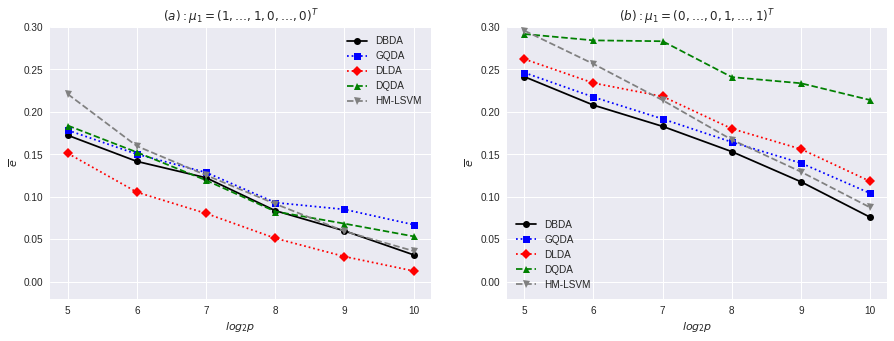

In [3]:
error_left = np.zeros((N_classifier, N_dim))
error_right = np.zeros((N_classifier, N_dim))
for i in range(N_dim):
    for j in range(N_classifier):
        error_left[j, i] = 1 - (result[0][i, j, 0] + result[0][i, j, 1]) / (2*iter)
        error_right[j, i] = 1 - (result[1][i, j, 0] + result[1][i, j, 1]) / (2*iter)

error = [error_left, error_right]   
title_list = ['$(a):\mu_1 = (1, \ldots, 1, 0, \ldots, 0)^T$', '$(b):\mu_1 = (0, \ldots, 0, 1, \ldots, 1)^T$']
pl = np.arange(5, 11, 1)

plt.figure(figsize=(15,5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(pl, error[i][0], 'o-', color='black', label='DBDA')
    plt.plot(pl, error[i][1], 's:', color='blue', label='GQDA')
    plt.plot(pl, error[i][2], 'D:', color='red', label='DLDA')
    plt.plot(pl, error[i][3], '^--', color='green', label='DQDA')
    plt.plot(pl, error[i][4], 'v--', color='gray', label='HM-LSVM')
    plt.ylim(-0.02, 0.3)
    plt.ylabel('$\overline{e}$')
    plt.xlabel('$log_2p$')
    plt.title(title_list[i])
    plt.legend()
 


## Figure2

(b): ${\boldsymbol \mu}_1= (0,\ldots,0, 1,\ldots, 1)^T $

$(II)\ p = 2^s, s = 5,\ldots, 10, \ (n_1, n_2) = (10, 20), \ (c_1, c_2) =(0.8, 1.2)$ and $ν = 25$ for (b)

In [4]:
np.random.seed(42)
t1 = time.time()
n = [10, 20]
c = [0.8, 1.2]
df = 25

N_class = 2
N_dim = 6
N_classifier = 5
iter = 2000

y = [-1] * n[0] + [1] * n[1]

svm = SVC(C=float('inf'), kernel='linear')

result = np.zeros((N_dim, N_classifier, N_class))


for s in range(N_dim):
    p = 2**(s+5)
    print('Dimension:{}'.format(p))
    print('Calculating...')

    mu = []
    mu.append(np.r_[np.zeros(p - int(np.ceil(p**(2/3)))), np.ones(int(np.ceil(p**(2/3))))])
    mu.append(np.zeros(p))

    S = np.zeros((p, p))
    for i in range(p):
        for j in range(p):
            S[i, j] = (1/2 + (i+1) / (p+1))**(1/2) * 0.3**(np.abs(i - j)**(1/3)) * (1/2 + (j + 1) / (p + 1))**(1/2)

    Sigma, P, Q = [], [], []
    for i in range(N_class):
        Sigma.append(c[i] * S)
        value, vec = la.eig(Sigma[i])
        P.append(np.sqrt(value)); Q.append(vec.T)


    for l in range(iter):
        x, trS, mean = [], [], []
        diag = []
        Y = []
        for i in range(N_class):
            Z = np.array([P[i] * (np.random.normal(0, 1, p)) for j in range(n[i])])
            X = np.dot(Z, Q[i]) / np.sqrt(np.random.chisquare(df, n[i]) / df).reshape(n[i], -1) + mu[i]
            Y.append(X)
            cov = np.cov(X, rowvar=False)
            trS.append(np.trace(cov))
            mean.append(np.mean(X, axis=0))
            diag.append(np.diag(cov))

            # creat new date
            z = P[i] * (np.random.normal(0, 1, p))
            x.append(np.dot(z, Q[i])  / np.sqrt(np.random.chisquare(df, 1) / df) + mu[i])



        #(3)DBDA
        for i in range(N_class):
            classifier = np.dot(x[i] - (mean[0] + mean[1]) / 2, mean[1] - mean[0]) - trS[0] / (2 * n[0]) + trS[1] / (2 * n[1])
            if (-1)**i * classifier < 0:
                result[s, 0, i] += 1

    
        #(6)GQDA
        for i in range(N_class):
            classifier = p*la.norm(x[i] - mean[0])**2 / trS[0] - p * la.norm(x[i] - mean[1])**2 / trS[1] - p * np.log(trS[1] / trS[0]) - p / n[0] + p / n[1]
            if (-1)**i * classifier < 0:
                result[s, 1, i] += 1

        #DLDA
        S_d_inv = np.diag((((n[0] - 1) * diag[0] + (n[1] - 1) * diag[1]) / (n[0] + n[1] - 2))**(-1))
        for i in range(N_class):
            classifier = np.einsum('i, ij, j', x[i] - (mean[0] + mean[1]) / 2, S_d_inv, mean[1] - mean[0])
            if (-1)**i * classifier < 0:
                result[s, 2, i] +=1

        #DQDA
        S_d0_inv = np.diag(diag[0]**(-1)); S_d1_inv = np.diag(diag[1]**(-1))
        for i in range(N_class):
            classifier = np.einsum('i, ij, j', x[i] - mean[0], S_d0_inv, x[i] - mean[0]) - np.einsum('i, ij, j', x[i] - mean[1], S_d1_inv, x[i] - mean[1]) \
                              - np.sum(np.log(diag[1])) + np.sum(np.log(diag[0]))
            if (-1)**i * classifier < 0:
                result[s, 3, i] += 1

        #HM-LSVM
        Y = np.r_[Y[0], Y[1]]
        svm.fit(Y, y)
        for i in range(N_class):
            classifier = svm.predict([x[i]])
            if (-1)**i * classifier < 0:
                result[s, 4, i] += 1
    

    print('Result')
    print('DBDA: (class1, class2) = ({}, {})'.format(result[s, 0, 0], result[s, 0, 1]))
    print('GQDA: (class1, class2) = ({}, {})'.format(result[s, 1, 0], result[s, 1, 1]))
    print('DLDA: (class1, class2) = ({}, {})'.format(result[s, 2, 0], result[s, 2, 1]))
    print('DQDA: (class1, class2) = ({}, {})'.format(result[s, 3, 0], result[s, 3, 1]))
    print('HM-LSVM: (class1, class2) = ({}, {})'.format(result[s, 4, 0], result[s, 4, 1]))
    print('Finished')
    print('')



t2 = time.time() - t1
print('Calculation time:{: .3f}'.format(t2))

Dimension:32
Calculating...
Result
DBDA: (class1, class2) = (1638.0, 1530.0)
GQDA: (class1, class2) = (1696.0, 1582.0)
DLDA: (class1, class2) = (1578.0, 1558.0)
DQDA: (class1, class2) = (1259.0, 1764.0)
HM-LSVM: (class1, class2) = (1395.0, 1535.0)
Finished

Dimension:64
Calculating...
Result
DBDA: (class1, class2) = (1659.0, 1597.0)
GQDA: (class1, class2) = (1717.0, 1656.0)
DLDA: (class1, class2) = (1582.0, 1592.0)
DQDA: (class1, class2) = (1131.0, 1869.0)
HM-LSVM: (class1, class2) = (1459.0, 1604.0)
Finished

Dimension:128
Calculating...
Result
DBDA: (class1, class2) = (1721.0, 1647.0)
GQDA: (class1, class2) = (1745.0, 1738.0)
DLDA: (class1, class2) = (1606.0, 1670.0)
DQDA: (class1, class2) = (1055.0, 1945.0)
HM-LSVM: (class1, class2) = (1523.0, 1679.0)
Finished

Dimension:256
Calculating...
Result
DBDA: (class1, class2) = (1760.0, 1683.0)
GQDA: (class1, class2) = (1759.0, 1800.0)
DLDA: (class1, class2) = (1636.0, 1711.0)
DQDA: (class1, class2) = (919.0, 1979.0)
HM-LSVM: (class1, clas

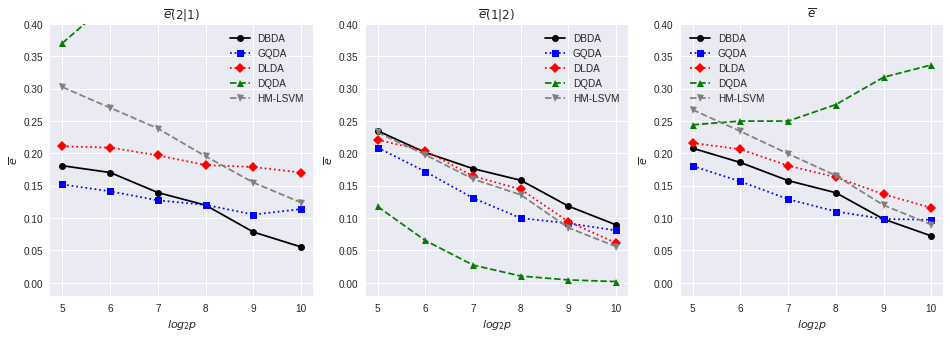

In [5]:
error2_1 = np.zeros((N_classifier, N_dim))
error1_2 = np.zeros((N_classifier, N_dim))
error = np.zeros((N_classifier, N_dim))
for i in range(N_dim):
    for j in range(N_classifier):
        error2_1[j, i] = 1 - result[i, j, 0] / iter
        error1_2[j, i] = 1 - result[i, j, 1] / iter
        error[j, i] = 1 - (result[i, j, 0] + result[i, j, 1]) / (2*iter)

error = [error2_1, error1_2, error]
title_list = ['$\overline{e}(2|1)$', '$\overline{e}(1|2)$', '$\overline{e}$']

pl = np.arange(5, 11, 1)

plt.figure(figsize=(16, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(pl, error[i][0], 'o-', color='black', label='DBDA')
    plt.plot(pl, error[i][1], 's:', color='blue', label='GQDA')
    plt.plot(pl, error[i][2], 'D:', color='red', label='DLDA')
    plt.plot(pl, error[i][3], '^--', color='green', label='DQDA')
    plt.plot(pl, error[i][4], 'v--', color='gray', label='HM-LSVM')
    plt.ylim(-0.02, 0.4)
    plt.ylabel('$\overline{e}$')
    plt.xlabel('$log_2p$')
    plt.title(title_list[i])
    plt.legend()

        

## Figure 3

$(b):{\boldsymbol \mu}_1 = (0, \ldots, 0, 1, \ldots, 1)^T$

$(Ⅲ) \ p=500, \ (c_1, c_2)=(0.8, 1.2), \ (n_1, n_2)=(10, 20)$ and $\mu = 10(10)60$ for (b)

In [9]:
np.random.seed(42)
t1 = time.time()
n = [10, 20]
c = [0.8, 1.2]
p = 500

N_class = 2
N_df = 6
N_classifier = 5
iter = 2000

y = [-1] * n[0] + [1] * n[1]
svm = SVC(C=float('inf'), kernel='linear')
result = np.zeros((N_df, N_classifier, N_class))

mu = []
mu.append(np.r_[np.zeros(p - int(np.ceil(p**(2/3)))), np.ones(int(np.ceil(p**(2/3))))])
mu.append(np.zeros(p))

S = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        S[i, j] = (1/2 + (i+1) / (p+1))**(1/2) * 0.3**(np.abs(i - j)**(1/3)) * (1/2 + (j + 1) / (p + 1))**(1/2)

Sigma, P, Q = [], [], []
for i in range(N_class):
    Sigma.append(c[i] * S)
    value, vec = la.eig(Sigma[i])
    P.append(np.sqrt(value)); Q.append(vec.T)

for v in range(6):
    df = (v+1)*10
    print('Degrees:{}'.format(df))
    print('Calculating...')

    for l in range(iter):
        x, trS, mean = [], [], []
        diag = []
        Y = []
        for i in range(N_class):
            Z = np.array([P[i] * (np.random.normal(0, 1, p)) for j in range(n[i])])
            X = np.dot(Z, Q[i]) / np.sqrt(np.random.chisquare(df, n[i]) / df).reshape(n[i], -1) + mu[i]
            Y.append(X)
            cov = np.cov(X, rowvar=False)
            trS.append(np.trace(cov))
            mean.append(np.mean(X, axis=0))
            diag.append(np.diag(cov))

            # creat new date
            z = P[i] * (np.random.normal(0, 1, p))
            x.append(np.dot(z, Q[i])  / np.sqrt(np.random.chisquare(df, 1) / df) + mu[i])



        #(3)DBDA
        for i in range(N_class):
            classifier = np.dot(x[i] - (mean[0] + mean[1]) / 2, mean[1] - mean[0]) - trS[0] / (2 * n[0]) + trS[1] / (2 * n[1])
            if (-1)**i * classifier < 0:
                result[v, 0, i] += 1


        #(6)GQDA
        for i in range(N_class):
            classifier = p*la.norm(x[i] - mean[0])**2 / trS[0] - p * la.norm(x[i] - mean[1])**2 / trS[1] - p * np.log(trS[1] / trS[0]) - p / n[0] + p / n[1]
            if (-1)**i * classifier < 0:
                result[v, 1, i] += 1

        #DLDA
        S_d_inv = np.diag((((n[0] - 1) * diag[0] + (n[1] - 1) * diag[1]) / (n[0] + n[1] - 2))**(-1))
        for i in range(N_class):
            classifier = np.einsum('i, ij, j', x[i] - (mean[0] + mean[1]) / 2, S_d_inv, mean[1] - mean[0])
            if (-1)**i * classifier < 0:
                result[v, 2, i] +=1

        #DQDA
        S_d0_inv = np.diag(diag[0]**(-1)); S_d1_inv = np.diag(diag[1]**(-1))
        for i in range(N_class):
            classifier = np.einsum('i, ij, j', x[i] - mean[0], S_d0_inv, x[i] - mean[0]) - np.einsum('i, ij, j', x[i] - mean[1], S_d1_inv, x[i] - mean[1]) \
                                - np.sum(np.log(diag[1])) + np.sum(np.log(diag[0]))
            if (-1)**i * classifier < 0:
                result[v, 3, i] += 1

        #HM-LSVM
        Y = np.r_[Y[0], Y[1]]
        svm.fit(Y, y)
        for i in range(N_class):
            classifier = svm.predict([x[i]])
            if (-1)**i * classifier < 0:
                result[v, 4, i] += 1

    print('Result')
    print('DBDA: (class1, class2) = ({}, {})'.format(result[v, 0, 0], result[v, 0, 1]))
    print('GQDA: (class1, class2) = ({}, {})'.format(result[v, 1, 0], result[v, 1, 1]))
    print('DLDA: (class1, class2) = ({}, {})'.format(result[v, 2, 0], result[v, 2, 1]))
    print('DQDA: (class1, class2) = ({}, {})'.format(result[v, 3, 0], result[v, 3, 1]))
    print('HM-LSVM: (class1, class2) = ({}, {})'.format(result[v, 4, 0], result[v, 4, 1]))
    print('Finished')
    print('')

t2 = time.time() - t1
print('Calculation time:{: .3f}'.format(t2))

Degrees:10
Calculating...
Result
DBDA: (class1, class2) = (1795.0, 1706.0)
GQDA: (class1, class2) = (1663.0, 1590.0)
DLDA: (class1, class2) = (1570.0, 1763.0)
DQDA: (class1, class2) = (889.0, 1924.0)
HM-LSVM: (class1, class2) = (1652.0, 1786.0)
Finished

Degrees:20
Calculating...
Result
DBDA: (class1, class2) = (1838.0, 1726.0)
GQDA: (class1, class2) = (1754.0, 1787.0)
DLDA: (class1, class2) = (1644.0, 1776.0)
DQDA: (class1, class2) = (809.0, 1992.0)
HM-LSVM: (class1, class2) = (1698.0, 1791.0)
Finished

Degrees:30
Calculating...
Result
DBDA: (class1, class2) = (1833.0, 1735.0)
GQDA: (class1, class2) = (1827.0, 1836.0)
DLDA: (class1, class2) = (1652.0, 1783.0)
DQDA: (class1, class2) = (756.0, 1999.0)
HM-LSVM: (class1, class2) = (1663.0, 1811.0)
Finished

Degrees:40
Calculating...
Result
DBDA: (class1, class2) = (1853.0, 1773.0)
GQDA: (class1, class2) = (1854.0, 1865.0)
DLDA: (class1, class2) = (1660.0, 1809.0)
DQDA: (class1, class2) = (746.0, 1997.0)
HM-LSVM: (class1, class2) = (1699.0

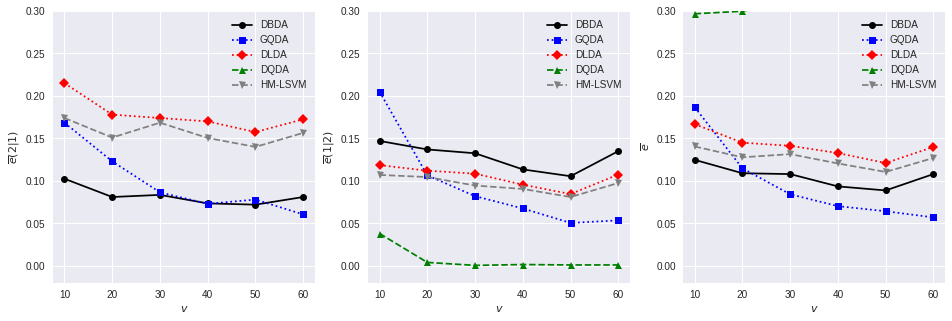

In [10]:
error2_1 = np.zeros((N_classifier, N_df))
error1_2 = np.zeros((N_classifier, N_df))
error = np.zeros((N_classifier, N_df))
for i in range(N_df):
    for j in range(N_classifier):
        error2_1[j, i] = 1 - result[i, j, 0] / iter
        error1_2[j, i] = 1 - result[i, j, 1] / iter
        error[j, i] = 1 - (result[i, j, 0] + result[i, j, 1]) / (2*iter)
        
error = [error2_1, error1_2, error]
title_list = ['$\overline{e}(2|1)$', '$\overline{e}(1|2)$', '$\overline{e}$']

pl = np.arange(10, 61, 10)

plt.figure(figsize=(16,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(pl, error[i][0], 'o-', color='black', label='DBDA')
    plt.plot(pl, error[i][1], 's:', color='blue', label='GQDA')
    plt.plot(pl, error[i][2], 'D:', color='red', label='DLDA')
    plt.plot(pl, error[i][3], '^--', color='green', label='DQDA')
    plt.plot(pl, error[i][4], 'v--', color='gray', label='HM-LSVM')
    plt.ylim(-0.02, 0.3)
    plt.legend(loc='upper right')
    plt.ylabel(title_list[i])
    plt.xlabel('$v$')

plt.show()